In [6]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 4]

from darts import TimeSeries

from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)

from darts.metrics import mape, smape
from darts.dataprocessing.transformers import Scaler

In [7]:
#Trainer(accelerator='gpu', devices=1)

In [8]:
data = pd.read_csv('simplenarx_dataset.txt')

In [9]:
series_input = TimeSeries.from_series(data['input'])
series_output = TimeSeries.from_series(data['output'])

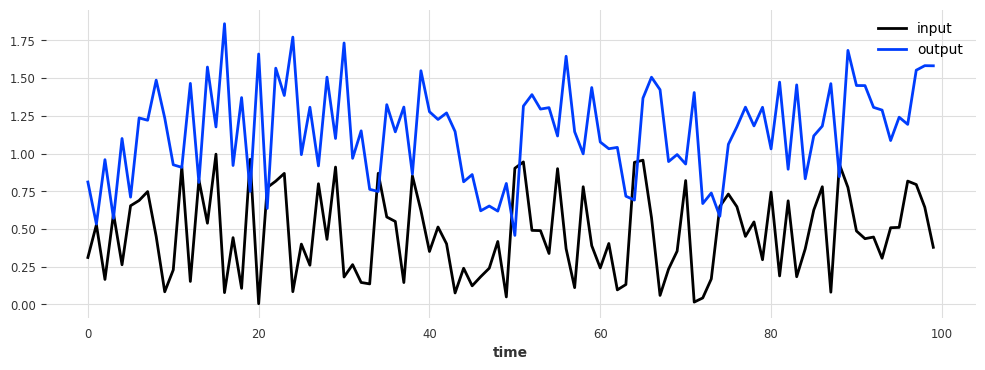

In [10]:
series_input.plot()
series_output.plot()

In [11]:
scaler_input, scaler_output = Scaler(), Scaler()
series_input_scaled = scaler_input.fit_transform(series_input)
series_output_scaled = scaler_output.fit_transform(series_output)

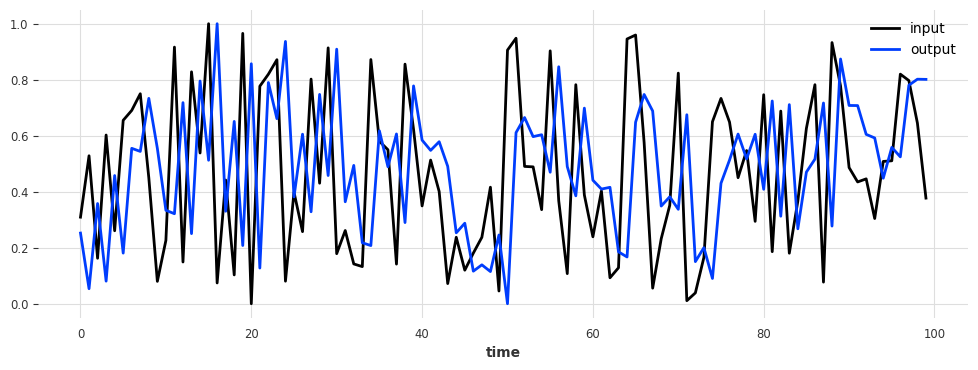

In [12]:
series_input_scaled.plot()
series_output_scaled.plot()

In [13]:
train_input, val_input = series_input_scaled[:-25], series_input_scaled[-25:]
train_output, val_output = series_output_scaled[:-25], series_output_scaled[-25:]



In [14]:
model_air = NBEATSModel(
    input_chunk_length=8, output_chunk_length=4, n_epochs=50, random_state=0
)



In [15]:
model_air.fit(train_output, verbose=True)

2022-10-24 15:52:44 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: False
2022-10-24 15:52:44 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-24 15:52:44 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-24 15:52:44 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
C:\Users\user\anaconda3\envs\darts_time_series\lib\site-packages\pytorch_lightning\trainer\trainer.py:1764: PossibleUserWarning: GPU available but not used. Set `accelerator` and `devices` using `Trainer(accelerator='gpu', devices=1)`.
  rank_zero_warn(
2022-10-24 15:52:44 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList  

Training: 0it [00:00, ?it/s]

2022-10-24 15:52:58 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=50` reached.


Predicting: 2it [00:00, ?it/s]

MAPE = 35.70%


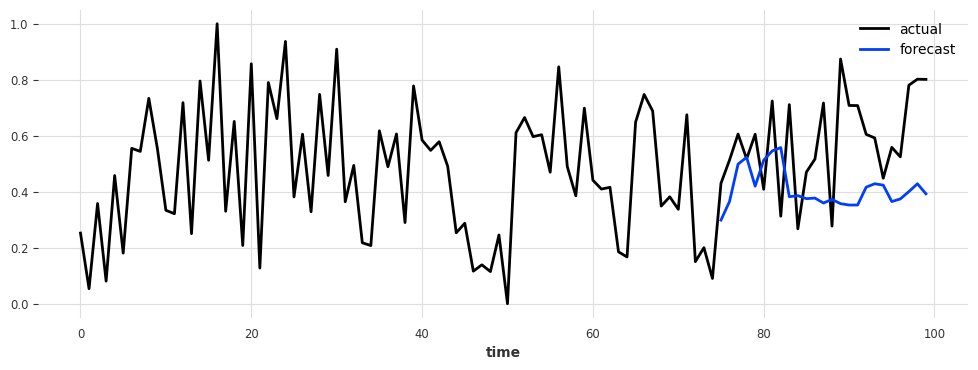

In [16]:
pred = model_air.predict(n=25)

series_output_scaled.plot(label="actual")
pred.plot(label="forecast")
plt.legend()
print("MAPE = {:.2f}%".format(mape(series_output_scaled, pred)))



In [18]:
model_cov = BlockRNNModel(
    model="GRU",
    input_chunk_length=4,
    output_chunk_length=4,
    n_epochs=500,
    random_state=0,
    pl_trainer_kwargs={
      "accelerator": "gpu",
      "devices": [0]
    },
)

model_cov.fit(
    series=train_output,
    past_covariates=train_input,
    verbose=True,
)



2022-10-24 15:55:16 pytorch_lightning.utilities.rank_zero INFO: GPU available: True (cuda), used: True
2022-10-24 15:55:16 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-10-24 15:55:16 pytorch_lightning.utilities.rank_zero INFO: IPU available: False, using: 0 IPUs
2022-10-24 15:55:16 pytorch_lightning.utilities.rank_zero INFO: HPU available: False, using: 0 HPUs
2022-10-24 15:55:20 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
2022-10-24 15:55:20 pytorch_lightning.callbacks.model_summary INFO: 
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 2.2 K 
4 | fc            | Sequential       | 104   
---------------------------------------------------
2.3 K     Trainable params
0         No

Training: 0it [00:00, ?it/s]

2022-10-24 15:55:41 pytorch_lightning.utilities.rank_zero INFO: `Trainer.fit` stopped: `max_epochs=500` reached.


2022-10-17 16:32:31 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

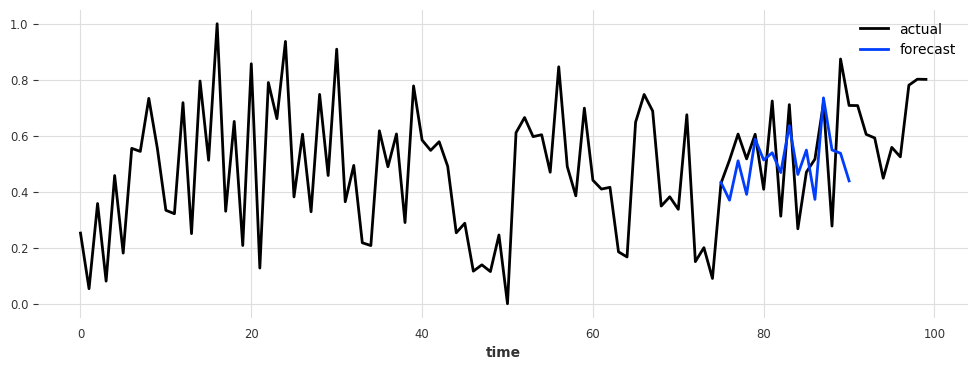

In [96]:
pred_cov = model_cov.predict(n=16, series=train_output, past_covariates=series_input_scaled)

series_output_scaled.plot(label="actual")
pred_cov.plot(label="forecast")
plt.legend()



  0%|          | 0/30 [00:00<?, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:47 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:48 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

2022-10-17 16:32:49 pytorch_lightning.accelerators.cuda INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: 3it [00:00, ?it/s]

MAPE (using covariates) = 47.10%


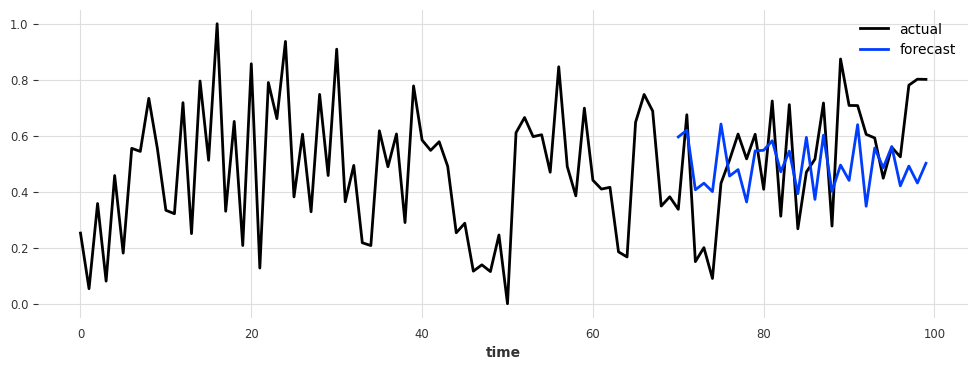

In [97]:
backtest_cov = model_cov.historical_forecasts(
    series_output_scaled,
    past_covariates=series_input_scaled,
    start=0.6,
    forecast_horizon=12,
    stride=1,
    retrain=False,
    verbose=True,
)

series_output_scaled.plot(label="actual")
backtest_cov.plot(label="forecast")
plt.legend()
print("MAPE (using covariates) = {:.2f}%".format(mape(series_output_scaled, backtest_cov)))